In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [4]:
import numpy as np

In [5]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [7]:
matplotlib.rc('font', **font)

In [8]:
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

In [9]:
files = ["../data/clean_expected.csv", "../data/clean_last_round.csv", "../data/clean_two_opponents.csv",
         "../data/clean_sixteen_states_two_rounds.csv", "../data/clean_sixteen_states_two_rounds_opponents.csv"]

In [10]:
heatmaps = []
extents = []

for file in files:
    df = pd.read_csv(file)
    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [11]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

In [12]:
min_ = 1
max_ = 1391629.0

In [13]:
titles = ["Perfect Memory Payoffs",
          "Limited Memory Payoffs" "\n" "(last round with one other player)",
          "Limited Memory Payoffs" "\n" "(last round with two other players)",
          "Limited Memory Payoffs" "\n" "(last two rounds with one other player)",
          "Limited Memory Payoffs" "\n" "(last two rounds with two other players)"]

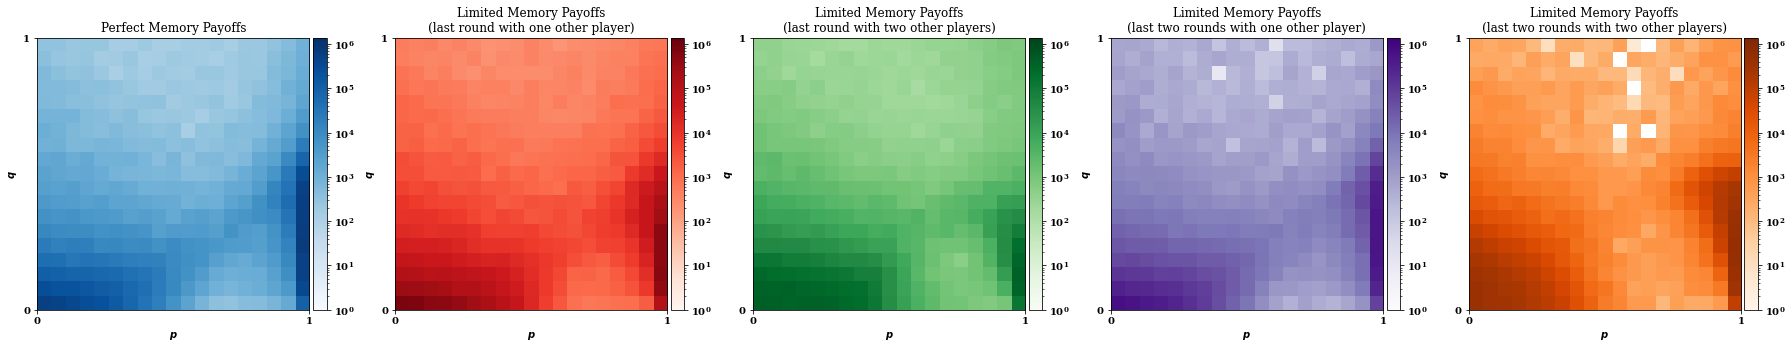

In [14]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 15))

for i, heatmap in enumerate(heatmaps):

    im = axes[i].imshow(heatmap.T, extent=extents[i], origin="lower", cmap=cmaps[i],
                     norm=colors.LogNorm(vmin=min_,vmax=max_))

    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")
    
    axes[i].set_title(titles[i])

fig.tight_layout()



# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

**Exploring the difference between last round and last round two opponents**

In [15]:
import numpy as np

In [16]:
def phiTwoOpponents(N, vRM, vMM, vMR, vRR, Rho):

    laplus = np.zeros((N - 1))
    laminus = np.zeros((N - 1))
    
    xs = []

    for k in range(1, N):
        x = np.zeros((4, 4))
        for i1 in range(4):
            for i2 in range(4):

                learner_role_model = (
                    1
                    / (N - 1)
                    * vRM[i1]
                    * (
                        (i1 == 1 & i2 == 1)
                        | (i1 == 2 & i2 == 3)
                        | (i1 == 3 & i2 == 2)
                        | (i1 == 4 & i2 == 4)
                    )
                    * (
                        1
                        / (N - 2)
                        / (N - 3)
                        * (
                            (k - 1) * (k - 2) * vRM[i1] * vMM[i2]
                            + (k - 1) * (N - k - 1) * vRM[i1] * vMR[i2]
                            + (N - k - 1) * (k - 1) * vRR[i1] * vMM[i2]
                            + (N - k - 1) * (N - k - 2) * vRR[i1] * vMR[i2]
                        )
                    )
                )

                mutant_mutant = (
                    (1 - 1 / (N - 1))
                    / (N - 2)
                    / (N - 3)
                    * ((k - 1) * (k - 2) * vRM[i1] * vMM[i2])
                    * (
                        (1 - 1 / (N - 2))
                        / (N - 3)
                        / (N - 4)
                        * (
                            (k - 2) * (k - 3) * vRM[i1] * vMM[i2]
                            + (k - 2) * (N - k - 1) * vRR[i1] * vMM[i2]
                            + (N - k - 1) * (k - 2) * vRM[i1] * vMR[i2]
                            + (N - k - 1) * (N - k - 2) * vRR[i1] * vMR[i2]
                        )
                        + 1
                        / (N - 2)
                        * vRM[i1]
                        * (
                            (i1 == 1 & i2 == 1)
                            | (i1 == 2 & i2 == 3)
                            | (i1 == 3 & i2 == 2)
                            | (i1 == 4 & i2 == 4)
                        )
                    )
                )

                mutant_resident = (
                    (1 - 1 / (N - 1))
                    / (N - 2)
                    / (N - 3)
                    * ((k - 1) * (N - k - 1) * vRM[i1] * vMR[i2])
                    * (
                        (1 - 1 / (N - 2))
                        / (N - 3)
                        / (N - 4)
                        * (
                            (k - 1) * (k - 3) * vRM[i1] * vMM[i2]
                            + (k - 1) * (N - k - 1) * vRR[i1] * vMM[i2]
                            + (N - k - 2) * (k - 2) * vRM[i1] * vMR[i2]
                            + (N - k - 2) * (N - k - 2) * vRR[i1] * vMR[i2]
                        )
                        + 1
                        / (N - 2)
                        * vRM[i1]
                        * (
                            (i1 == 1 & i2 == 1)
                            | (i1 == 2 & i2 == 3)
                            | (i1 == 3 & i2 == 2)
                            | (i1 == 4 & i2 == 4)
                        )
                    )
                )

                resident_mutant = (
                    (1 - 1 / (N - 1))
                    / (N - 2)
                    / (N - 3)
                    * ((N - k - 1) * (k - 1) * vRR[i1] * vMM[i2])
                    * (
                        (1 - 1 / (N - 2))
                        / (N - 3)
                        / (N - 4)
                        * (
                            (k - 2) * (k - 2) * vRM[i1] * vMM[i2]
                            + (k - 2) * (N - k - 2) * vRR[i1] * vMM[i2]
                            + (N - k - 1) * (k - 1) * vRM[i1] * vMR[i2]
                            + (N - k - 1) * (N - k - 3) * vRR[i1] * vMR[i2]
                        )
                        + 1
                        / (N - 2)
                        * vRM[i1]
                        * (
                            (i1 == 1 & i2 == 1)
                            | (i1 == 2 & i2 == 3)
                            | (i1 == 3 & i2 == 2)
                            | (i1 == 4 & i2 == 4)
                        )
                    )
                )

                resident_resident = (
                    (1 - 1 / (N - 1))
                    / (N - 2)
                    / (N - 3)
                    * (N - k - 1)
                    * (N - k - 2)
                    * vRR[i1]
                    * vMR[i2]
                    * (
                        (1 - 1 / (N - 2))
                        / (N - 3)
                        / (N - 4)
                        * (
                            (k - 1) * (k - 2) * vRM[i1] * vMM[i2]
                            + (k - 1) * (N - k - 2) * vRR[i1] * vMM[i2]
                            + (N - k - 2) * (k - 1) * vRM[i1] * vMR[i2]
                            + (N - k - 2) * (N - k - 3) * vRR[i1] * vMR[i2]
                        )
                        + 1
                        / (N - 2)
                        * vRM[i1]
                        * (
                            (i1 == 1 & i2 == 1)
                            | (i1 == 2 & i2 == 3)
                            | (i1 == 3 & i2 == 2)
                            | (i1 == 4 & i2 == 4)
                        )
                    )
                )

                x[i1, i2] = learner_role_model + (
                    mutant_mutant
                    + mutant_resident
                    + resident_mutant
                    + resident_resident
                )
            
        laplus[k - 1] = sum(sum(np.dot(x, Rho)))
        laminus[k - 1] = sum(sum(np.dot(x, Rho.T)))
        
    gammas = np.divide(laminus, laplus)

    return 1 / (1 + np.sum(np.cumprod(gammas)))

In [85]:
def phi_last_round(N, vRM, vMM, vMR, vRR, Rho):
    laplus = np.zeros((N - 1))
    laminus = np.zeros((N - 1))

    for k in range(1, N):
        x = np.zeros((4, 4))
        for i1 in range(4):
            for i2 in range(4):
                x[i1, i2] = 1 / (N - 1) * vRM[i1] * (
                    (i1 == 1 & i2 == 1)
                    | (i1 == 2 & i2 == 3)
                    | (i1 == 3 & i2 == 2)
                    | (i1 == 4 & i2 == 4)
                ) + (1 - 1 / (N - 1)) / (N - 2) / (N - 3) * (
                    (k - 1) * (k - 2) * vRM[i1] * vMM[i2]
                    + (k - 1) * (N - k - 1) * vRM[i1] * vMR[i2]
                    + (N - k - 1) * (k - 1) * vRR[i1] * vMM[i2]
                    + (N - k - 1) * (N - k - 2) * vRR[i1] * vMR[i2]
                )

        laplus[k - 1] = sum(sum(np.dot(x, Rho)))
        laminus[k - 1] = sum(sum(np.dot(x, Rho.T)))

    gammas = np.divide(laminus, laplus)

    return 1 / (1 + np.sum(np.cumprod(gammas)))

In [86]:
def calcRho(u, beta):

    Rho = np.zeros((4, 4))
    for i1 in range(4):
        for i2 in range(4):
            Rho[i1, i2] = 1 / (1 + np.exp(-beta * (u[i2] - u[i1])))

    return Rho

In [164]:
resident = [1, 0, 1]

Rho = calcRho([2, -1, 3, 0], beta=1)
delta = 0.999

N = 100

In [271]:
residents = [[0, 0, 0],
             [0, 0, 1], 
             [0, 1, 1], 
             [0, 1, 0]]

In [272]:
import evol_dynamics
import tqdm

In [273]:
per_point = []

for resident in residents:

    datas = []

    for _ in tqdm.notebook.tqdm(range(10 ** 5)):

        mutant = [np.random.random() for _ in range(3)]


        vMM = evol_dynamics.expected_distribution_last_round(mutant, mutant, 0.999)
        vMR = evol_dynamics.expected_distribution_last_round(mutant, resident, 0.999)
        vRM = evol_dynamics.expected_distribution_last_round(resident, mutant, 0.999)
        vRR = evol_dynamics.expected_distribution_last_round(resident, resident, 0.999)

        phi_one = phiTwoOpponents(N, vRM, vMM, vMR, vRR, Rho)
        phi_two = phi_last_round(N, vRM, vMM, vMR, vRR, Rho)

        data = mutant + [phi_one, phi_two]

        datas.append(data)
    per_point.append(datas)

In [277]:
for i, datas in enumerate(per_point):
    two_rounds = pd.DataFrame(datas)
    two_rounds.columns = ['y', 'p', 'q', 'phi two opponents', 'phi']
    
    two_rounds.to_csv(f"{i}_points_defector.csv")

In [280]:
dfs = [pd.DataFrame(data, 
                    columns = ['y', 'p', 'q', r'$\phi$ two opponents', r'$\phi$']) 
       for data in [per_point[1], per_point[2], per_point[0], per_point[3]]]

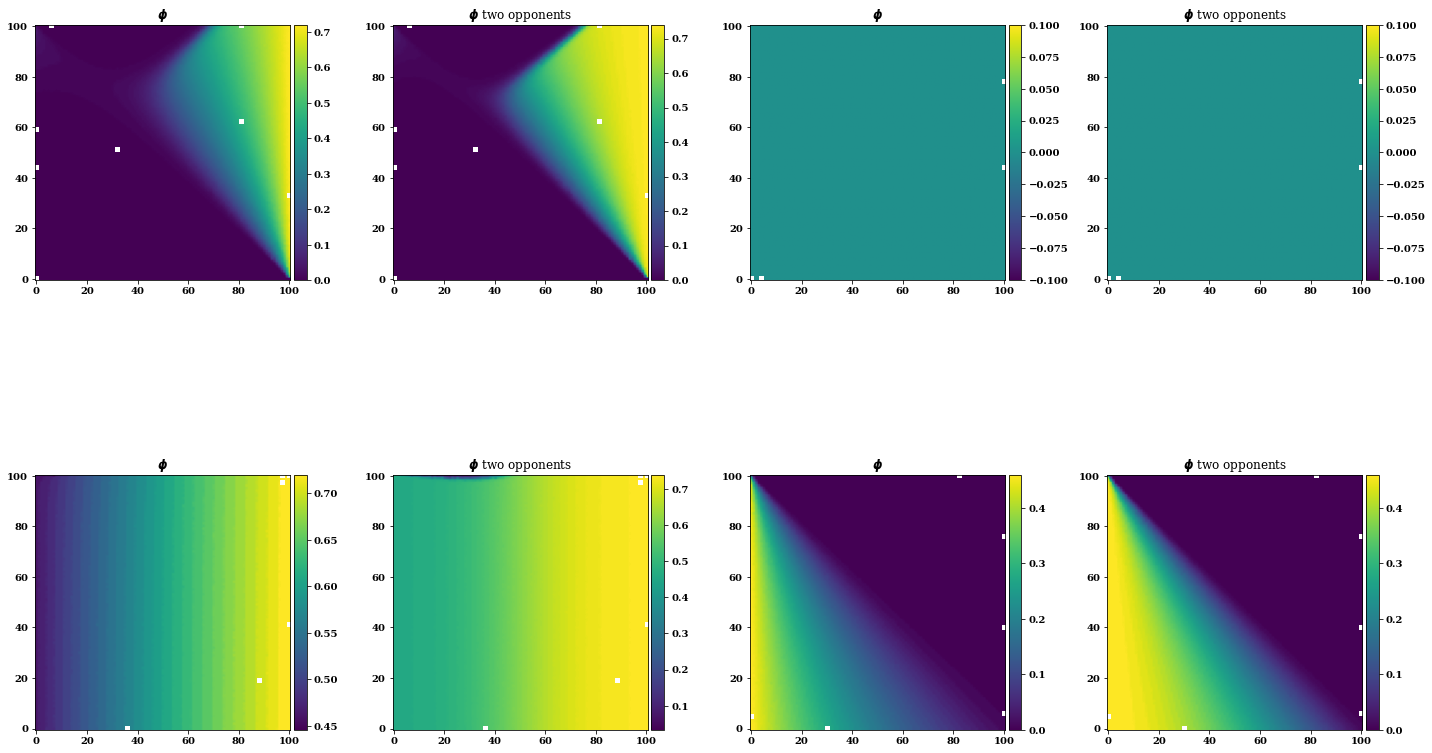

In [281]:
indices = ((i, j) for i in range(2) for j in range(4))

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 20))

for df in dfs:
    for column in [r'$\phi$', '$\phi$ two opponents']:
        piv = pd.pivot_table(df.round(2), values=column, index=["p"], columns=["q"], )
        
        index = indices.__next__()
    

        im = axes[index].imshow(piv, );

        divider = make_axes_locatable(axes[index])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        axes[index].set_title(column)

        axes[index].invert_yaxis()
    plt.tight_layout()

In [278]:
dfs = [pd.DataFrame(data, 
                    columns = ['y', 'p', 'q', r'$\phi$ two opponents', r'$\phi$']) 
       for data in [per_point[1], per_point[2], per_point[0], per_point[3]]]

In [268]:
residents_plot = [[1, 0, 1], [1, 1, 1], [1, 0, 0],  [1, 1, 0]]

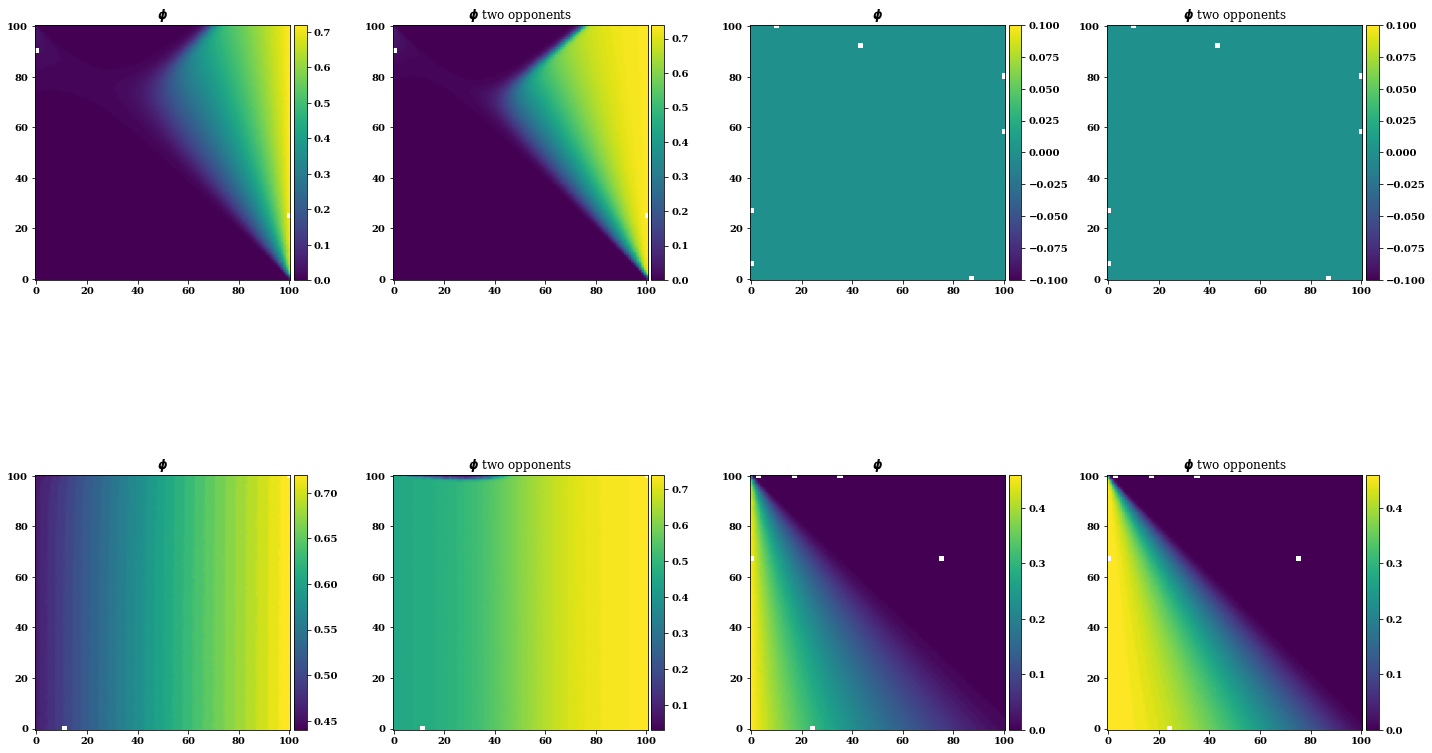

In [270]:
indices = ((i, j) for i in range(2) for j in range(4))

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 20))

for df in dfs:
    for column in [r'$\phi$', '$\phi$ two opponents']:
        piv = pd.pivot_table(df.round(2), values=column, index=["p"], columns=["q"], )
        
        index = indices.__next__()
    

        im = axes[index].imshow(piv, );

        divider = make_axes_locatable(axes[index])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        axes[index].set_title(column)

        axes[index].invert_yaxis()
    plt.tight_layout()

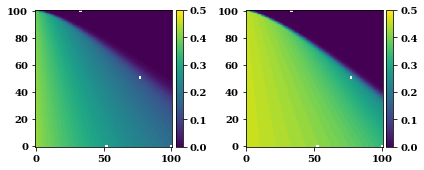

In [142]:
fig, axes = plt.subplots(ncols=2)

for i, column in enumerate(['phi', 'phi two opponents']):
    piv = pd.pivot_table(two_rounds.round(2), values=column, index=["p"], columns=["q"], )

    im = axes[i].imshow(piv, vmax=0.5);
    
    divider = make_axes_locatable(axes[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i].invert_yaxis()
plt.tight_layout()

In [119]:
piv = pd.pivot_table(two_rounds.round(2), values="phi two opponents",index=["p"], columns=["q"], )

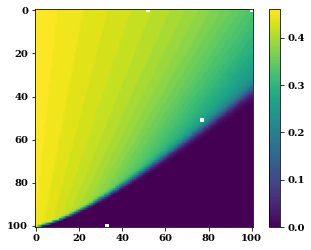

In [120]:
plt.imshow(piv,);

plt.colorbar();

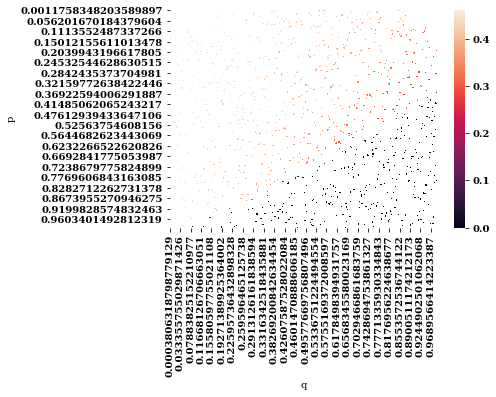

In [47]:
data_pivoted = two_rounds.pivot("p", "q", "phi")

ax = sns.heatmap(data_pivoted)

In [56]:
dfs[1].sort_values('frequencies', ascending=False)

,y,p,q,average cooperation rate,average score,t,frequencies
37500,0.977671,0.996646,0.113590,0.971377,1.942754,7591220,18765
27581,0.510122,0.999880,0.071698,0.991622,1.983244,5543521,16106
2398,0.646690,0.999720,0.081839,0.992377,1.984755,479955,15768
36530,0.140138,0.997111,0.149591,0.975567,1.951133,7365127,14107
47781,0.569040,0.999149,0.088514,0.985805,1.971610,9719325,11883
...,...,...,...,...,...,...,...
19758,0.690840,0.373912,0.533754,0.460394,0.920789,3988311,1
40694,0.637864,0.945439,0.011009,0.174960,0.349920,8273787,1
4229,0.147829,0.607183,0.142279,0.265674,0.531348,883075,1
34500,0.385858,0.894013,0.041912,0.284072,0.568144,6899680,1


In [57]:
dfs[2]

,y,p,q,average cooperation rate,average score,t,frequencies
0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1416
1,0.616295,0.669364,0.037202,0.102534,0.205068,1416,16
2,0.027399,0.985180,0.539331,0.971551,1.943101,1432,33
3,0.932912,0.096444,0.599107,0.399052,0.798105,1465,6
4,0.537321,0.205008,0.434041,0.353307,0.706613,1471,14
...,...,...,...,...,...,...,...
50523,0.141181,0.993672,0.048724,0.871764,1.743527,9997884,91
50524,0.696240,0.866220,0.667809,0.832936,1.665872,9997975,7
50525,0.123385,0.446948,0.348379,0.386182,0.772363,9997982,11
50526,0.530765,0.274760,0.008265,0.011976,0.023951,9997993,557


**The following is true for: R=,2,; S=,-1,; T=,3,; P=,0,; N=,100,; beta=,1,; nIt=,10000000,**

In [58]:
dfs = [pd.read_csv(file) for file in files]

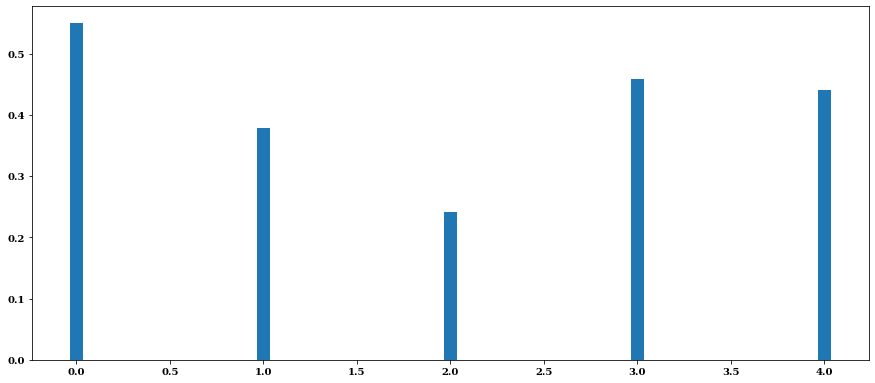

In [59]:
fig, axes = plt.subplots(figsize=(15, 6.5));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)) for df in dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.07);

# axes[i].set_ylabel("cooperation rate", weight="bold", fontsize=12);

# axes[i].set_ylim(0, 1);
# axes[i].set_xticks([0, 0.1, 0.2]);
# axes[i].set_xticklabels([bars[0], bars[1], ""], fontsize=12);

In [60]:
N = 100
vMM = [0.3573,   0.2404,   0.2404, 0.1620]
vRR = [0.0110,   0.0916,   0.0916, 0.8059]
vMR = [0.2962,   0.3594,   0.1556, 0.1888]
vRM = [0.2962,   0.1556,   0.3594, 0.1888]

In [30]:
i1 = 1
i2 = 1

In [40]:
k = 3

In [41]:
first_round = 1 / (N - 1) * vRM[i1] * ((i1==1 & i2==1) | (i1==2 & i2==3) | (i1==3 &i2==2) | (i1==4 & i2==4))
first_round

0.0015717171717171718

In [45]:
def second_round(k):
    return 1 / (N - 2) / (N - 3) * ((k - 1) * (k - 2) * vRM[i1] * vMM[i2] + (k - 1) * (N - k - 1) * vRM[i1] * vMR[i2] + (N - k - 1) * (k - 1) * vRR[i1] * vMM[i2] + (N - k - 1) * (N - k - 2) * vRR[i1] * vMR[i2])

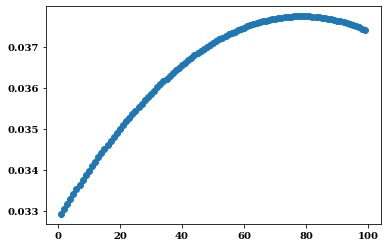

In [47]:
plt.scatter(range(1, N), [second_round(k) for k in range(1, N)]);

In [274]:
import sympy as sym


In [387]:
N, k, q = sym.symbols("N, k, q")

delta = sym.symbols("\delta")

In [388]:
ALLD = (0, 0, 0)
GTFT = (1, 1, q)

In [389]:
import evol_dynamics

In [390]:
probas = evol_dynamics.theoretical_probabilities_for_opponents(N, k)

In [391]:
R = evol_dynamics.formulation.probability_being_in_state_R
S = evol_dynamics.formulation.probability_being_in_state_S
T = evol_dynamics.formulation.probability_being_in_state_T
P = evol_dynamics.formulation.probability_being_in_state_P


In [392]:
equation = 0

step_one_state = S(GTFT, ALLD, delta)

for state in [R, S, T, P]:
    for state_two in [R, S, T, P]:

        expr = probas['learner-role-model-resident-role-model-learner-mutant'] * state(GTFT, GTFT, delta) * state_two(ALLD, ALLD, delta)
        expr += probas['learner-role-model-resident-role-model-learner-resident'] * state(GTFT, GTFT, delta) * state_two(ALLD, GTFT, delta)
        expr += probas['learner-role-model-mutant-role-model-learner-resident'] * state(GTFT, ALLD, delta) * state_two(ALLD, GTFT, delta)
        expr += probas['learner-role-model-mutant-role-model-learner-mutant'] * state(GTFT, ALLD, delta) * state_two(ALLD, ALLD, delta)
    

In [393]:
vRR = [R(GTFT, GTFT, delta), S(GTFT, GTFT, delta), T(GTFT, GTFT, delta), P(GTFT, GTFT, delta)]
vRM = [R(GTFT,  ALLD, delta), S(GTFT,  ALLD, delta), T(GTFT,  ALLD, delta), P(GTFT, ALLD, delta)]
vMR = [R(ALLD, GTFT, delta), S(ALLD, GTFT, delta), T(ALLD, GTFT, delta), P(ALLD, GTFT, delta)]
vMM = [R(ALLD, ALLD, delta), S(ALLD, ALLD, delta), T(ALLD, ALLD, delta), P(ALLD, ALLD, delta)]

In [394]:
r, s, t, p = sym.symbols("R, S, T, P")
beta = sym.symbols(r"\beta")

In [395]:
def calcRho(u, beta):

    Rho = sym.zeros(4)
    for i1 in range(4):
        for i2 in range(4):
            Rho[i1, i2] = 1 / (1 + sym.exp(-beta * (u[i2] - u[i1])))

    return Rho

In [396]:
Rho = calcRho([r, s, t, p], beta)

In [560]:
def chi(vRM, vMM, vMR, vRR, N, k=1):
    x = sym.zeros(4)
    for i1 in range(4):
        for i2 in range(4):

            learner_role_model = (
                1
                / (N - 1)
                * vRM[i1]
                * int(
                (i1 == 0 and i2 == 0) or (i1 == 1 and i2 == 2) or (i1 == 2 and i2 == 1) or (i1 == 3 and i2 == 3)
            )
                * (
                    1
                    / (N - 2)
                    / (N - 3)
                    * (
                        (k - 1) * (k - 2) * vRM[i1] * vMM[i2]
                        + (k - 1) * (N - k - 1) * vRM[i1] * vMR[i2]
                        + (N - k - 1) * (k - 1) * vRR[i1] * vMM[i2]
                        + (N - k - 1) * (N - k - 2) * vRR[i1] * vMR[i2]
                    )
                )
            )

            mutant_mutant = (
                (1 - 1 / (N - 1))
                / (N - 2)
                / (N - 3)
                * ((k - 1) * (k - 2) * vRM[i1] * vMM[i2])
                * (
                    (1 - 1 / (N - 2))
                    / (N - 3)
                    / (N - 4)
                    * (
                        (k - 2) * (k - 3) * vRM[i1] * vMM[i2]
                        + (k - 2) * (N - k - 1) * vRR[i1] * vMM[i2]
                        + (N - k - 1) * (k - 2) * vRM[i1] * vMR[i2]
                        + (N - k - 1) * (N - k - 2) * vRR[i1] * vMR[i2]
                    )
                    + 1
                    / (N - 2)
                    * vRM[i1]
                    * int(
                (i1 == 0 and i2 == 0) or (i1 == 1 and i2 == 2) or (i1 == 2 and i2 == 1) or (i1 == 3 and i2 == 3)
            )
                )
            )

            mutant_resident = (
                (1 - 1 / (N - 1))
                / (N - 2)
                / (N - 3)
                * ((k - 1) * (N - k - 1) * vRM[i1] * vMR[i2])
                * (
                    (1 - 1 / (N - 2))
                    / (N - 3)
                    / (N - 4)
                    * (
                        (k - 1) * (k - 3) * vRM[i1] * vMM[i2]
                        + (k - 1) * (N - k - 1) * vRR[i1] * vMM[i2]
                        + (N - k - 2) * (k - 2) * vRM[i1] * vMR[i2]
                        + (N - k - 2) * (N - k - 2) * vRR[i1] * vMR[i2]
                    )
                    + 1
                    / (N - 2)
                    * vRM[i1]
                    * int(
                (i1 == 0 and i2 == 0) or (i1 == 1 and i2 == 2) or (i1 == 2 and i2 == 1) or (i1 == 3 and i2 == 3)
            )
                )
            )

            resident_mutant = (
                (1 - 1 / (N - 1))
                / (N - 2)
                / (N - 3)
                * ((N - k - 1) * (k - 1) * vRR[i1] * vMM[i2])
                * (
                    (1 - 1 / (N - 2))
                    / (N - 3)
                    / (N - 4)
                    * (
                        (k - 2) * (k - 2) * vRM[i1] * vMM[i2]
                        + (k - 2) * (N - k - 2) * vRR[i1] * vMM[i2]
                        + (N - k - 1) * (k - 1) * vRM[i1] * vMR[i2]
                        + (N - k - 1) * (N - k - 3) * vRR[i1] * vMR[i2]
                    )
                    + 1
                    / (N - 2)
                    * vRM[i1]
                    * int(
                (i1 == 0 and i2 == 0) or (i1 == 1 and i2 == 2) or (i1 == 2 and i2 == 1) or (i1 == 3 and i2 == 3)
            )
                )
            )

            resident_resident = (
                (1 - 1 / (N - 1))
                / (N - 2)
                / (N - 3)
                * (N - k - 1)
                * (N - k - 2)
                * vRR[i1]
                * vMR[i2]
                * (
                    (1 - 1 / (N - 2))
                    / (N - 3)
                    / (N - 4)
                    * (
                        (k - 1) * (k - 2) * vRM[i1] * vMM[i2]
                        + (k - 1) * (N - k - 2) * vRR[i1] * vMM[i2]
                        + (N - k - 2) * (k - 1) * vRM[i1] * vMR[i2]
                        + (N - k - 2) * (N - k - 3) * vRR[i1] * vMR[i2]
                    )
                    + 1
                    / (N - 2)
                    * vRM[i1]
                    * int(
                (i1 == 0 and i2 == 0) or (i1 == 1 and i2 == 2) or (i1 == 2 and i2 == 1) or (i1 == 3 and i2 == 3)
            )
                )
            )

            x[i1, i2] = learner_role_model + (
                mutant_mutant
                + mutant_resident
                + resident_mutant
                + resident_resident
            )
            
    return x

In [547]:
def chi_last_round(vRM, vMM, vMR, vRR, N, k=1):

    x = sym.zeros(4)
    for i1 in range(4):
        for i2 in range(4):

            x[i1, i2] = 1 / (N - 1) * vRM[i1] * int(
                (i1 == 0 and i2 == 0) or (i1 == 1 and i2 == 2) or (i1 == 2 and i2 == 1) or (i1 == 3 and i2 == 3)
            ) + (1 - 1 / (N - 1)) / (N - 2) / (N - 3) * (
                (k - 1) * (k - 2) * vRM[i1] * vMM[i2]
                + (k - 1) * (N - k - 1) * vRM[i1] * vMR[i2]
                + (N - k - 1) * (k - 1) * vRR[i1] * vMM[i2]
                + (N - k - 1) * (N - k - 2) * vRR[i1] * vMR[i2]
            )
    return x

In [ ]:
def chi_two_opponents():
    

In [551]:
x_last_round  = chi_last_round(vRM, vMM, vMR, vRR, N, k=1)

In [553]:
x_last_round[2] = x_last_round[2].factor()

In [554]:
x_last_round[3] = x_last_round[3].factor()

In [555]:
from sympy.matrices import matrix_multiply_elementwise

In [556]:
sum(matrix_multiply_elementwise(x_last_round, Rho)) / sum(matrix_multiply_elementwise(x_last_round, Rho.T))

(\delta*(1 - q)/(2*(N - 1)) - \delta*(N - 2)*(q - 1)/((1 + exp(-\beta*(P - R)))*(N - 1)) + (\delta*q - \delta + 1)/((1 + exp(-\beta*(-S + T)))*(N - 1)) + (N - 2)*(\delta*q - \delta + 1)/((1 + exp(-\beta*(-R + T)))*(N - 1)))/(\delta*(1 - q)/(2*(N - 1)) - \delta*(N - 2)*(q - 1)/((1 + exp(-\beta*(-P + R)))*(N - 1)) + (\delta*q - \delta + 1)/((1 + exp(-\beta*(S - T)))*(N - 1)) + (N - 2)*(\delta*q - \delta + 1)/((1 + exp(-\beta*(R - T)))*(N - 1)))

In [568]:
exp = sum(matrix_multiply_elementwise(x_last_round, Rho))

In [573]:
sym.limit(exp, beta, 0)

1/2

In [559]:
sum(matrix_multiply_elementwise(x_last_round, Rho.T))

\delta*(1 - q)/(2*(N - 1)) - \delta*(N - 2)*(q - 1)/((1 + exp(-\beta*(-P + R)))*(N - 1)) + (\delta*q - \delta + 1)/((1 + exp(-\beta*(S - T)))*(N - 1)) + (N - 2)*(\delta*q - \delta + 1)/((1 + exp(-\beta*(R - T)))*(N - 1))

In [561]:
x = chi(vRM, vMM, vMR, vRR, N, k=1)

In [564]:
x[2] = x[2].factor()

In [565]:
x[3] = x[3].factor()

In [566]:
sum(matrix_multiply_elementwise(x, Rho))

\delta**2*(N - 3)*(q - 1)**2/((1 + exp(-\beta*(P - R)))*(N - 1)) + (N - 3)*(\delta*q - \delta + 1)**2/((1 + exp(-\beta*(-R + T)))*(N - 1))

In [567]:
sum(matrix_multiply_elementwise(x, Rho.T))

\delta**2*(N - 3)*(q - 1)**2/((1 + exp(-\beta*(-P + R)))*(N - 1)) + (N - 3)*(\delta*q - \delta + 1)**2/((1 + exp(-\beta*(R - T)))*(N - 1))

In [580]:
(((delta * q - delta + 1) ** 2).expand() - (delta ** 2) * (q - 1) ** 2).simplify()

2*\delta*q - 2*\delta + 1

In [417]:
x.dot(Rho)[10] +  x.dot(Rho)[11]

(1 - 1/(N - 2))*(1 - 1/(N - 1))*(\delta*(q + (1 - q)*(\delta*q - \delta + 1))**2/((-\delta*(1 - q)**2 + 1)*(-\delta**2*(1 - q)**2 + 1)) + (1 - \delta)/(-\delta**2*(1 - q)**2 + 1))**2*(\delta*q - \delta + 1)**2/(1 + exp(-\beta*(R - T))) + (1 - 1/(N - 2))*(1 - 1/(N - 1))*(\delta*(q + (1 - q)*(\delta*q - \delta + 1))**2/((-\delta*(1 - q)**2 + 1)*(-\delta**2*(1 - q)**2 + 1)) + (1 - \delta)/(-\delta**2*(1 - q)**2 + 1))**2*(\delta*q - \delta + 1)**2/(1 + exp(-\beta*(-P + R)))

In [419]:
x.dot(Rho)[12] +  x.dot(Rho)[13]

\delta**2*(1 - q)**2*(1 - 1/(N - 2))*(1 - 1/(N - 1))*(\delta*(q + (1 - q)*(\delta*q - \delta + 1))**2/((-\delta*(1 - q)**2 + 1)*(-\delta**2*(1 - q)**2 + 1)) + (1 - \delta)/(-\delta**2*(1 - q)**2 + 1))**2/2 + \delta**2*(1 - q)**2*(1 - 1/(N - 2))*(1 - 1/(N - 1))*(\delta*(q + (1 - q)*(\delta*q - \delta + 1))**2/((-\delta*(1 - q)**2 + 1)*(-\delta**2*(1 - q)**2 + 1)) + (1 - \delta)/(-\delta**2*(1 - q)**2 + 1))**2/(1 + exp(-\beta*(R - S)))

In [420]:
x.dot(Rho)[14] +  x.dot(Rho)[15]

\delta**2*(1 - q)**2*(1 - 1/(N - 2))*(1 - 1/(N - 1))*(\delta*(q + (1 - q)*(\delta*q - \delta + 1))**2/((-\delta*(1 - q)**2 + 1)*(-\delta**2*(1 - q)**2 + 1)) + (1 - \delta)/(-\delta**2*(1 - q)**2 + 1))**2/(1 + exp(-\beta*(R - T))) + \delta**2*(1 - q)**2*(1 - 1/(N - 2))*(1 - 1/(N - 1))*(\delta*(q + (1 - q)*(\delta*q - \delta + 1))**2/((-\delta*(1 - q)**2 + 1)*(-\delta**2*(1 - q)**2 + 1)) + (1 - \delta)/(-\delta**2*(1 - q)**2 + 1))**2/(1 + exp(-\beta*(-P + R)))

In [297]:
probas['learner-role-model-resident-role-model-learner-mutant']
probas['learner-role-model-resident-role-model-learner-resident']
probas['learner-role-model-mutant-role-model-learner-resident']
probas['learner-role-model-mutant-role-model-learner-mutant']

(1 - 1/(N - 1))*(k - 1)*(N - k - 1)/((N - 3)*(N - 2)*(N - 1))

In [294]:
probas

{'learner-role-model': 1/(N - 1),
 'learner-resident-role-model-resident': (1 - 1/(N - 1))*(N - k - 2)*(N - k - 1)/((N - 3)*(N - 2)),
 'learner-resident-role-model-mutant': (1 - 1/(N - 1))*(k - 1)*(N - k - 1)/((N - 3)*(N - 2)),
 'learner-mutant-role-model-resident': (1 - 1/(N - 1))*(k - 1)*(N - k - 1)/((N - 3)*(N - 2)),
 'learner-mutant-role-model-mutant': (1 - 1/(N - 1))*(k - 2)*(k - 1)/((N - 3)*(N - 2)),
 'learner-role-model-resident-role-model-learner-resident': (1 - 1/(N - 1))*(N - k - 2)*(N - k - 1)/((N - 3)*(N - 2)*(N - 1)),
 'learner-role-model-mutant-role-model-learner-resident': (1 - 1/(N - 1))*(k - 1)*(N - k - 1)/((N - 3)*(N - 2)*(N - 1)),
 'learner-role-model-resident-role-model-learner-mutant': (1 - 1/(N - 1))*(k - 1)*(N - k - 1)/((N - 3)*(N - 2)*(N - 1)),
 'learner-role-model-mutant-role-model-learner-mutant': (1 - 1/(N - 1))*(k - 2)*(k - 1)/((N - 3)*(N - 2)*(N - 1)),
 'learner-resident-resident-role-model-resident-resident': (1 - 1/(N - 1))*(N - k - 3)*(N - k - 2)**2*(N -